In [1]:
import pandas as pd

In [2]:
import glob
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats as sp
import numpy as np

In [5]:
path = r'AJM_results_2' # use your path

In [6]:
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [7]:
df = df.drop(df.columns[0],axis=1)

In [8]:
df['rel_VSS'] = df['VSS']/(df['opt_val']+df['VSS'])
# rel_VSS is the additional value of the stochastic solution as a proportion of
# the DETERMINISTIC solution, i.e. stochastic solution is 100*(rel_VSS)% better.

In [ ]:
D = 40 # dataset
N = 100 # nb_scenarios

P = 0.05 # dropout probability
G = 0.05 # gap

dataset_selector = df['dataset'] == D
nb_scenarios_selector = df['nb_scenarios'] == N
P_selector = df['P_dropout_pairs'] == P
gap_selector = df['miprelstop_setting'] == G

selected_df = df[dataset_selector & nb_scenarios_selector & P_selector & gap_selector]

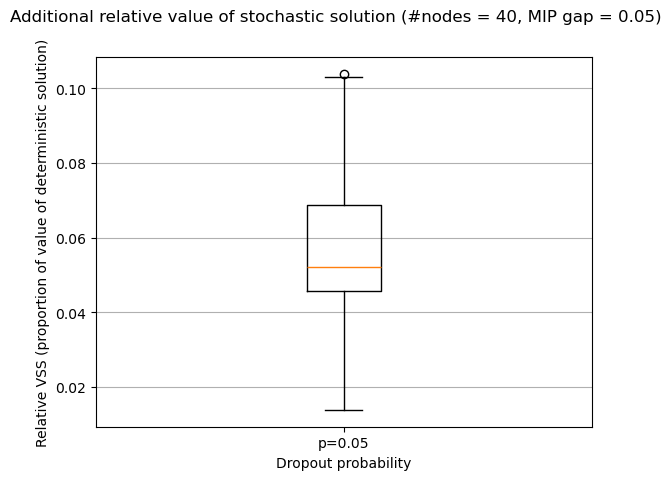

In [27]:
fig, ax = plt.subplots()

ax.boxplot(selected_df['rel_VSS'])

fig.suptitle(f'Additional relative value of stochastic solution (#nodes = {D}, MIP gap = {G})')
ax.set_xlabel('Dropout probability')
ax.set_ylabel('Relative VSS (proportion of value of deterministic solution)')

ax.yaxis.grid(True)
ax.set_xticks([1], labels=['p=0.05'])

plt.show()

In [ ]:
# Not sure I'm using this...
means = selected_df.mean()
std = selected_df.std()